In [38]:
import tensorflow as tf
import zipfile
import os 
import random
import csv
import math
import shutil
from shutil import copyfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img

In [10]:
#extracting data from zip
try:
    local_zip = './data/archive_data/archive.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./data/data_1')
    zip_ref.close()
#if data is already extracted it will instead print file already extracted
except:
    print('file already extracted')

In [70]:
#extracting data from zip
try:
    local_zip = './data/archive_data/new_dataset.zip'
    zip_ref = zipfile.ZipFile(local_zip, 'r')
    zip_ref.extractall('./data/data_2')
    zip_ref.close()
#if data is already extracted it will instead print file already extracted
except:
    print('file already extracted')

In [71]:
#create directory to seperate data_1 to its label 
root_dir = "./data/data_1/cancerimages/"
dir_1 = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions']
dir_2 = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions', 'squamous_cell_carcinoma']
def create_dir(root_path):
    if os.path.exists(root_dir):
        shutil.rmtree(root_dir)
    for i in dir_1:
        os.makedirs(os.path.join(root_path, i))
            
create_dir(root_path=root_dir)

In [72]:
tumor=[]
for j in range (1,8):
    data=[]
    img=[]
    with open('./data/data_1/GroundTruth.csv') as f:
        reader = csv.reader(f, delimiter=',')
        next(reader)
        for row in reader:
            img.append(row[0] + '.jpg')
            data.append(math.ceil(float(row[j])))
        tumor.append(data)
print(f"there is {len(data)} data in data_1")
print(f"with {len(tumor)} classifications")

there is 10015 data in data_1
with 7 classifications


In [73]:
root = './data/data_2/ISIC_Labelled'
file = []
for files in os.walk(root, topdown=True):
    file.append(files)
    
ffile = file[1:]
file = []
counter = 0
for x in ffile:
    counter += len(x[2])

print(f"there is {counter} data in data_2")
tumor_2 = len(os.listdir(root))
print(f"with {tumor_2} classifications")

there is 25331 data in data_2
with 8 classifications


In [75]:
counter = 0
for i in range (len(tumor)):
    labels = []
    for j in range (len(tumor[i])):
        if tumor[i][j] == 1:
            labels.append(img[j])
    print(f"Tumor {dir_1[counter]} have {len(labels)} data")
    
    root = './data/data_1/images/'
    root_dest = './data/data_1/cancerimages'
    for i in labels:
        source_img = os.path.join(root, i)
        destination = os.path.join(f"{root_dest}/{dir_1[counter]}", i)
        copyfile(source_img, destination)
        
    counter+=1

Tumor melanoma have 1113 data
Tumor melanocytic_nevi have 6705 data
Tumor basal_cell_carcinoma have 514 data
Tumor bowen_disease have 327 data
Tumor benign_keratosis have 1099 data
Tumor dermatofibroma have 115 data
Tumor vascular_lesions have 142 data


In [76]:
root_dir = "./data/final_dataset"
def create_dir(root_path):
    if os.path.exists(root_dir):
        shutil.rmtree(root_dir)

    os.makedirs(os.path.join(root_path, 'training'))
    os.makedirs(os.path.join(root_path, 'validation'))

    for i in dir_2:
        os.makedirs(os.path.join(f'{root_path}/training', i))
        os.makedirs(os.path.join(f'{root_path}/validation', i))
            
create_dir(root_path=root_dir)

In [77]:
path = './data/data_2/ISIC_Labelled'

dir_new = ['melanoma', 'melanocytic_nevi', 'basal_cell_carcinoma', 'bowen_disease', 'benign_keratosis', 'dermatofibroma', 'vascular_lesions', 'squamous_cell_carcinoma']
dir_old = ['Melanoma', 'Melanocytic nevus', 'Basal cell carcinoma', 'Actinic keratosis', 'Benign keratosis', 'Dermatofibroma', 'Vascular lesion', 'Squamous cell carcinoma']

counter = 0

for filename in os.listdir(path):
    file_path = os.path.join(path, filename)
    name = os.path.splitext(filename)
    
    for i, x in enumerate(dir_old):
        if x in name:
            postfix = dir_new[i]
            new_name = os.path.join(path, postfix)
            os.rename(file_path, new_name)
            continue
    counter += 1

In [82]:
for root, dirs, files in os.walk(path):
    for filename in files:
        if filename.endswith('.jpg'):

            new_filename = 'new_' + filename

            old_filepath = os.path.join(root, filename)
            new_filepath = os.path.join(root, new_filename)

  
            os.rename(old_filepath, new_filepath) 

In [83]:
counter = 0
for i in range (len(tumor)):
    labels = []
    for j in range (len(tumor[i])):
        if tumor[i][j] == 1:
            if len(labels) > 110:
                continue
            else:
                labels.append(img[j])
    

    split = round(len(labels) * 0.8)

    training = labels[:split]
    val = labels[split:]
    print(f"Training data is {len(training)}")
    print(f"Validation data is {len(val)}\n")
    
    root = './data/data_1/images/'
    root_dest = './data/final_dataset'
    for i in training:
        source_img = os.path.join(root, i)
        destination = os.path.join(f"{root_dest}/training/{dir_1[counter]}", i)
        copyfile(source_img, destination)
    
    for i in val:
        source_img = os.path.join(root, i)
        destination = os.path.join(f"{root_dest}/validation/{dir_1[counter]}", i)
        copyfile(source_img, destination)
        
    counter+=1

Training data is 89
Validation data is 22

Training data is 89
Validation data is 22

Training data is 89
Validation data is 22

Training data is 89
Validation data is 22

Training data is 89
Validation data is 22

Training data is 89
Validation data is 22

Training data is 89
Validation data is 22



In [84]:
counter = 0

for file in (dir_new):
    dir = os.listdir(f"{path}/{file}")
    

    training = dir[:192]
    val = dir[192:239]
    print(f"Training data is {len(training)}")
    print(f"Validation data is {len(val)}\n")
    
    root = './data/data_2/ISIC_Labelled/'
    root_dest = './data/final_dataset'
    for i in training:
        source_img = os.path.join(f"{root}/{dir_new[counter]}", i)
        destination = os.path.join(f"{root_dest}/training/{dir_2[counter]}", i)
        copyfile(source_img, destination)
    
    for i in val:
        source_img = os.path.join(f"{root}/{dir_new[counter]}", i)
        destination = os.path.join(f"{root_dest}/validation/{dir_2[counter]}", i)
        copyfile(source_img, destination)
        
    counter+=1

Training data is 192
Validation data is 47

Training data is 192
Validation data is 47

Training data is 192
Validation data is 47

Training data is 192
Validation data is 47

Training data is 192
Validation data is 47

Training data is 192
Validation data is 47

Training data is 192
Validation data is 47

Training data is 192
Validation data is 47



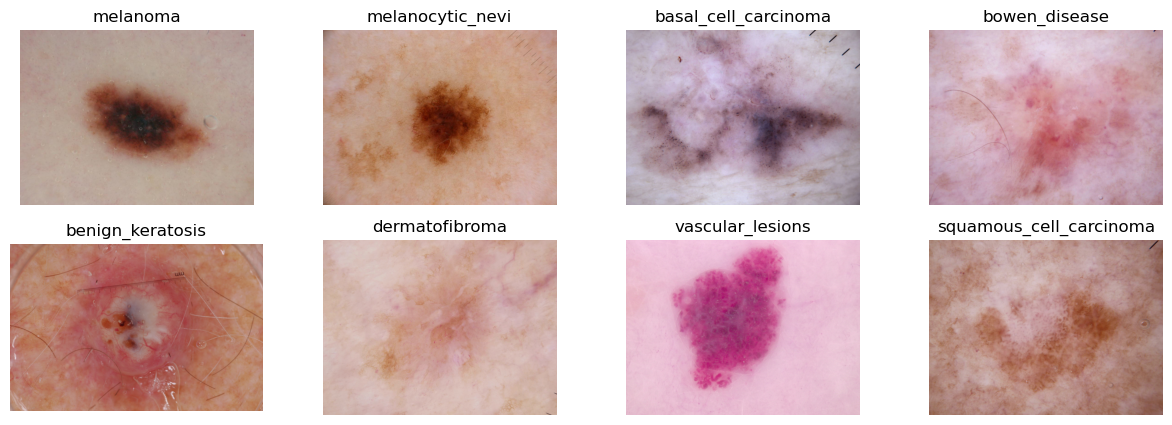

In [85]:
#show image example
root_path = './data/final_dataset/training/'
fig, axes = plt.subplots(2, 4, figsize=(15,5))
counter = 0
for i in range(2):
    for j in range(4):
        ax = axes[i][j]
        ax.set_title(dir_new[counter])
        ax.imshow(load_img(f"{os.path.join(f'{root_path}/{dir_new[counter]}', os.listdir(f'{root_path+dir_new[counter]}')[random.randint(0,100)])}"))
        ax.set_axis_off()
        plt.show
        counter += 1

In [86]:
training_main = './data/final_dataset/training'
validation_main = './data/final_dataset/validation'

In [87]:
training_paths = []
val_paths = []
for class_name in dir_new:
    training_path = os.path.join(training_main, class_name)
    val_path = os.path.join(validation_main, class_name)
    training_paths.append(training_path)
    val_paths.append(val_path)

In [88]:
for i, class_path in enumerate (training_paths):
    print(class_path)
print('\n')
for i, class_path in enumerate (val_paths):
    print(class_path)

./data/final_dataset/training\melanoma
./data/final_dataset/training\melanocytic_nevi
./data/final_dataset/training\basal_cell_carcinoma
./data/final_dataset/training\bowen_disease
./data/final_dataset/training\benign_keratosis
./data/final_dataset/training\dermatofibroma
./data/final_dataset/training\vascular_lesions
./data/final_dataset/training\squamous_cell_carcinoma


./data/final_dataset/validation\melanoma
./data/final_dataset/validation\melanocytic_nevi
./data/final_dataset/validation\basal_cell_carcinoma
./data/final_dataset/validation\bowen_disease
./data/final_dataset/validation\benign_keratosis
./data/final_dataset/validation\dermatofibroma
./data/final_dataset/validation\vascular_lesions
./data/final_dataset/validation\squamous_cell_carcinoma


In [89]:
def train_val_generators(training_main, validation_main):
    train_datagen = ImageDataGenerator(
        rescale=1./255.,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    train_generator = train_datagen.flow_from_directory(
        directory=training_main,
        target_size=(150, 150),
        batch_size=45,
        class_mode='categorical'
    )

    validation_datagen = ImageDataGenerator(rescale=1./255.)
    validation_generator = validation_datagen.flow_from_directory(
        directory=validation_main,
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical'
    )

    return train_generator, validation_generator

In [90]:
train_generator, validation_generator = train_val_generators(training_main, validation_main)

Found 3396 images belonging to 8 classes.
Found 906 images belonging to 8 classes.


In [93]:
def create_model():
    
    model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
  ])
  

    model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])       
  
    return model

In [ ]:
# Save your model
model = create_model()

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# Train your model
history = model.fit(validation_generator,
                    epochs=15)

Epoch 1/15
29/29 [==============================] - 27s 899ms/step - loss: 2.0106 - accuracy: 0.2064
Epoch 2/15
29/29 [==============================] - 21s 723ms/step - loss: 1.7893 - accuracy: 0.2914
Epoch 3/15
29/29 [==============================] - 23s 800ms/step - loss: 1.7420 - accuracy: 0.3201
Epoch 4/15
29/29 [==============================] - 21s 705ms/step - loss: 1.6528 - accuracy: 0.3664
Epoch 5/15
29/29 [==============================] - 21s 719ms/step - loss: 1.4992 - accuracy: 0.4216
Epoch 6/15
 8/29 [=======>......................] - ETA: 16s - loss: 1.2945 - accuracy: 0.5469